<a href="https://colab.research.google.com/github/benwalkerdata/Portfolio-R-KMC/blob/main/KMC_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>K Means Clsutering Project - R</h1>
For this project I will use data from the UCI archive based off of red and white wines.

<h2>Get the data</h2>


In [3]:
df1 <- read.csv('winequality-red.csv',sep=';')
df2 <- read.csv('winequality-white.csv',sep=';')

In [4]:
#I'll add a label column to both dataframes indicating red or white.
df1$label <- sapply(df1$pH,function(x){'red'})
df2$label <- sapply(df2$pH,function(x){'white'})

In [5]:
head(df1)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,label
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,red
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,red
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,red
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,red


In [6]:
head(df2)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,label
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6,white
2,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6,white
3,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6,white
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6,white
5,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6,white
6,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6,white


In [7]:
#combine the two dataframes together
wine <- rbind(df1,df2)

In [8]:
str(wine)

'data.frame':	6497 obs. of  13 variables:
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 7.5 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.5 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0 0.06 0 0.02 0.36 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 6.1 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.071 ...
 $ free.sulfur.dioxide : num  11 25 15 17 11 13 15 15 9 17 ...
 $ total.sulfur.dioxide: num  34 67 54 60 34 40 59 21 18 102 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.35 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.8 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 10.5 ...
 $ quality             : int  5 5 5 6 5 5 5 7 7 5 ...
 $ label               : chr  "red" "red" "red" "red" ...


<h2>Explore the Data</h2>

In [9]:
library(ggplot2)

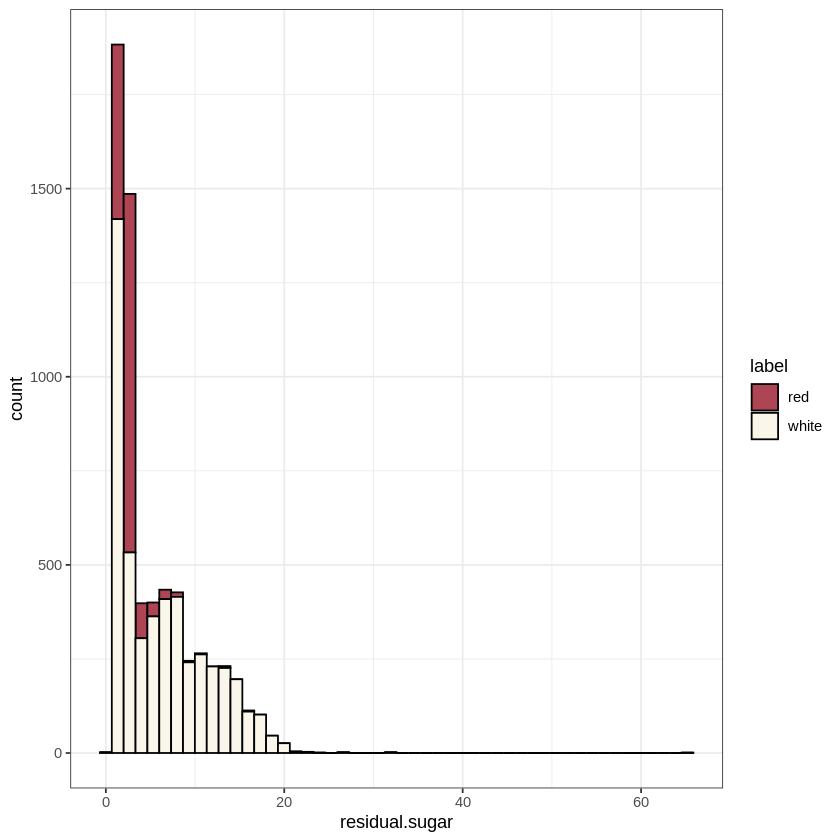

In [10]:
#Plot residual sugar from the winedata, color by red/white wines.
pl <- ggplot(wine,aes(x=residual.sugar)) + geom_histogram(aes(fill=label),color='black',bins=50)
pl + scale_fill_manual(values=c('#ae4554','#faf7ea')) + theme_bw()

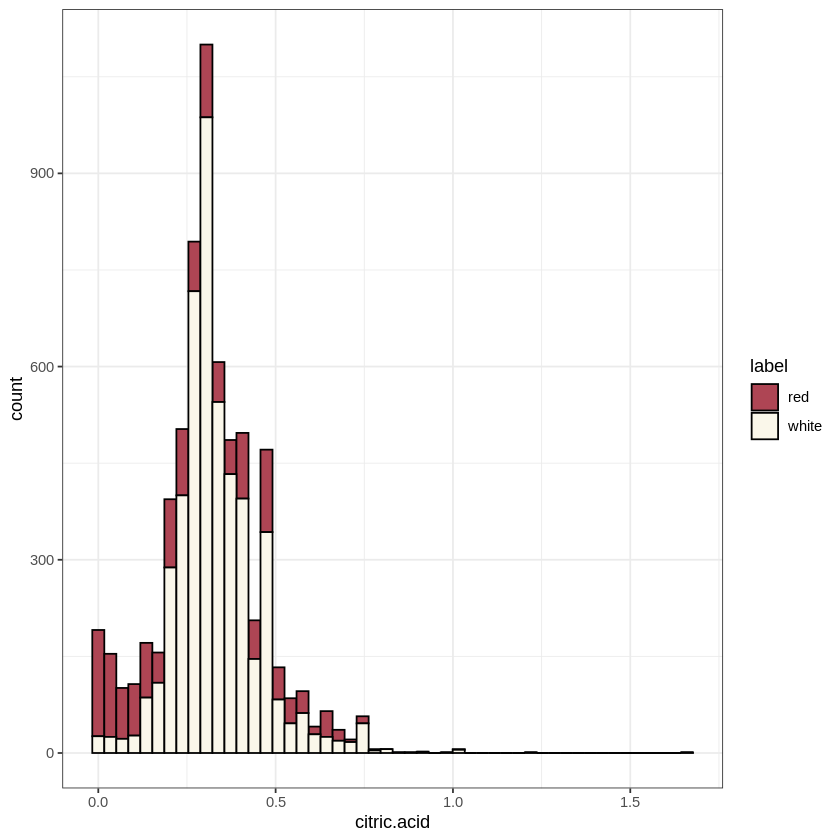

In [11]:
#Plot histogram of citric acid, color by wine color
pl <- ggplot(wine,aes(x=citric.acid)) +geom_histogram(aes(fill=label),color='black',bins=50)
pl + scale_fill_manual(values = c('#ae4554','#faf7ea')) + theme_bw()

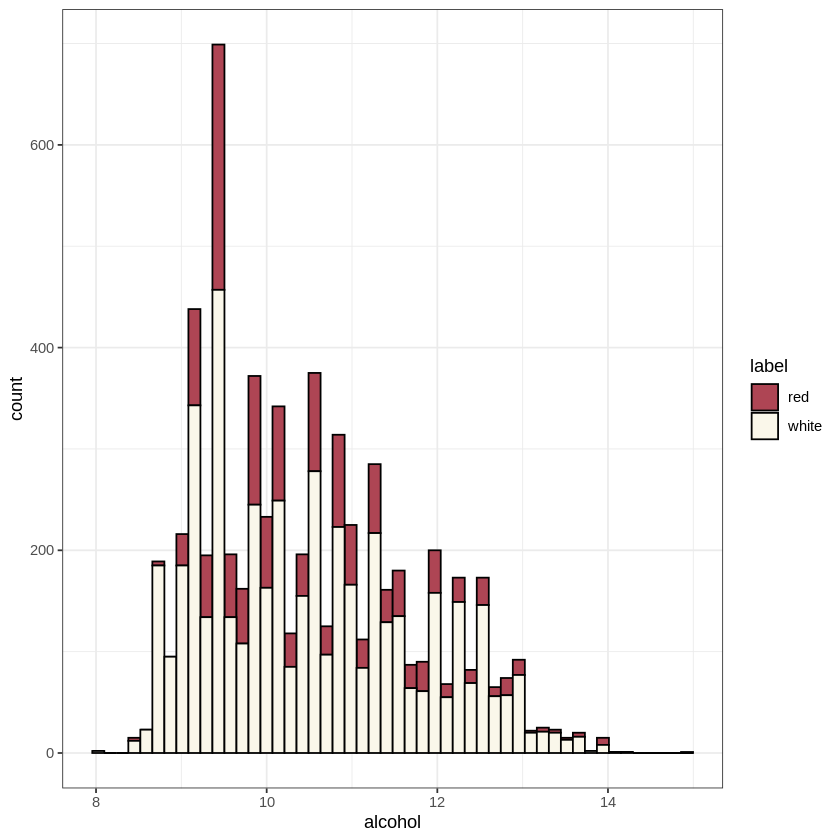

In [12]:
#Create histogram of alcohol from wine data, color by wine.
pl <-ggplot(wine,aes(x=alcohol)) + geom_histogram(aes(fill=label),color='black',bins=50)
pl + scale_fill_manual(values = c('#ae4554','#faf7ea')) + theme_bw()

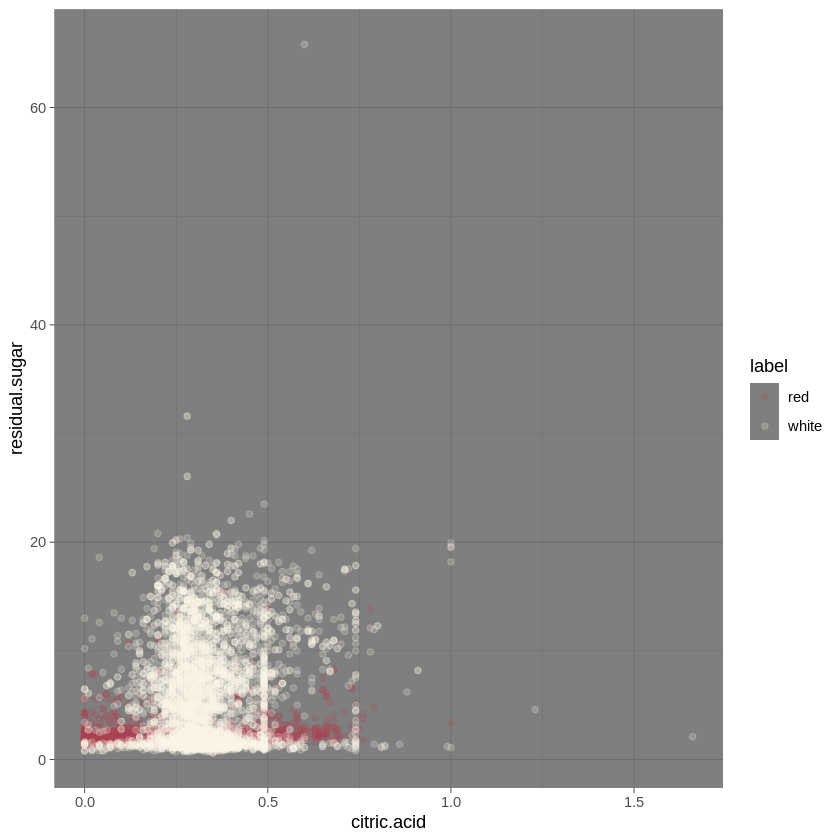

In [13]:
#Create a scatterplot of residual sugar vs citrix.acid.Color by wine.
pl <- ggplot(wine,aes(x=citric.acid,y=residual.sugar)) + geom_point(aes(color=label),alpha=0.2)
pl + scale_color_manual(values = c('#ae4554','#faf7ea')) +theme_dark()

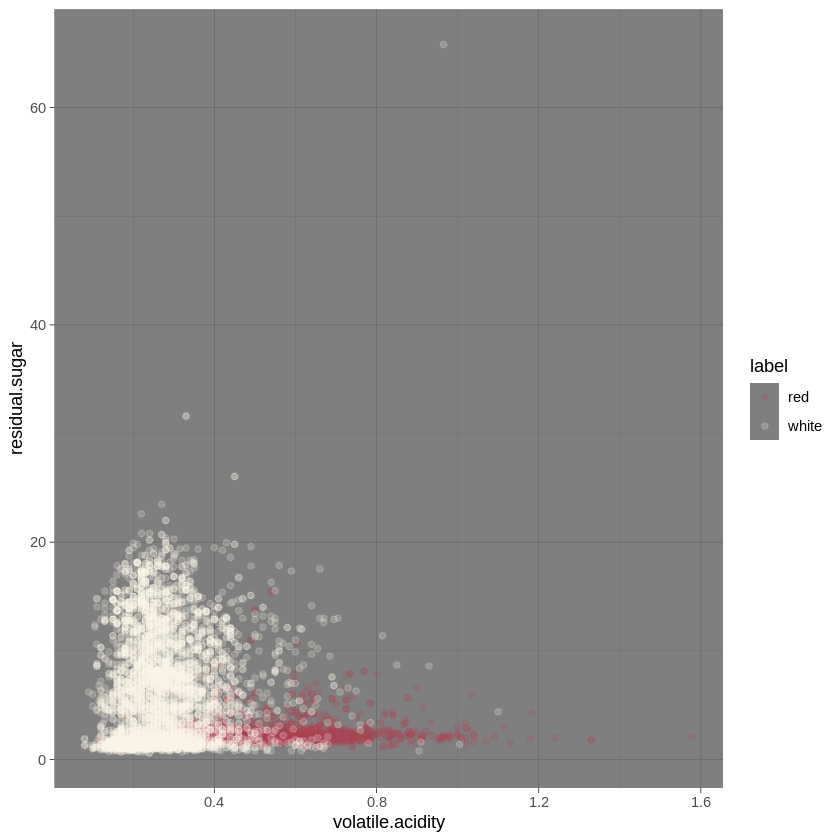

In [14]:
#Create a scatterplot of volatile.acidity vs residual.sugar, color by wine
pl <- ggplot(wine,aes(x=volatile.acidity,y=residual.sugar)) + geom_point(aes(color=label),alpha=0.2)
pl + scale_color_manual(values = c('#ae4554','#faf7ea')) +theme_dark()

In [15]:
#Create a new dataframe without the label column.
clus.data <- wine[,1:12]

In [16]:
head(clus.data)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


<h2>Building the Clusters</h2>

In [17]:
wine.cluster <- kmeans(wine[1:12],2)

In [18]:
print(wine.cluster$centers)

  fixed.acidity volatile.acidity citric.acid residual.sugar chlorides
1      6.904698        0.2871364   0.3398094       7.259286 0.0486092
2      7.619044        0.4079451   0.2911080       3.082690 0.0656846
  free.sulfur.dioxide total.sulfur.dioxide   density       pH sulphates
1            39.82503            155.90101 0.9947956 3.190308 0.5000354
2            18.43735             63.54832 0.9945680 3.255147 0.5718655
   alcohol  quality
1 10.25832 5.825436
2 10.79529 5.809204


<h2>Evaluating the Clusters</h2>


In [19]:
table(wine$label,wine.cluster$cluster)

       
           1    2
  red     84 1515
  white 3588 1310

The confusion matrix shows that red wine is easier to cluster together, which makes senses given our previous visualisations. There seems to be a of noise with white wines,this could also be due to "Rose" wines being categorised as white wine, while still retaining the qualities of a red wine. Overall this makes sense since wine is essentially just fermented grape juice and the chemical measurements we were provided may not correlate well with whether or not the wine is red or white.